<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 500>
<h1 align=center><font size = 6,5>Final Project 2 (Logistic Regression dan SVM)</font></h1>

# Kelompok 4 - PYTN KS 017

- Fadil Febriansyah  : PYTN-KS17-016 <br>
- Nabila Firzariani  : PYTN-KS17-011 <br>
- Nurhidayatul       : PYTN-KS17-008 <br>
- Riga Jaya          : PYTN-KS17-020 <br>
        
MSIB Kampus Merdeka Batch 5

----------------------------------
# A. Perkenalan

## A.1. Latar Belakang
Cuaca merupakan faktor alam yang sangat mempengaruhi kehidupan manusia. Dalam kehidupan sehari-hari, banyak aktivitas dan tindakan manusia yang bergantung pada faktor dan keadaan cuaca. Seseorang yang akan berpergian membutuhkan informasi cuaca untuk menentukan tujuan perjalanan dan keputusan untuk berangkat pada tujuan tersebut. Mengantisipasi cuaca merupakan kebutuhan manusia untuk dapat melakukan aktivitas dengan baik. Faktor-faktor yang mempengaruhi cuaca antara lain suhu, kelembaban, tekanan udara, kecepatan angin, dan lainnya. Salah satu fenomena terpenting dalam kehidupan yang dipengaruhi oleh cuaca adalah hujan. 

Hujan merupakan fenomena yang tidak dapat dihindari dimana cuaca merupakan salah satu faktor yang mempengaruhi terjadinya hujan. Oleh karena itu, prakiraan terkait cuaca menjadi sangat penting. Apakah besok akan hujan atau tidak dapat bisa menilai dari klasifikasinya. Metode statistik dan pembelajaran machine learning untuk memprediksi hujan akan dibandingkan dalam project ini. Pada project ini, kami ingin melakukan prediksi pada kejadian hujan di Australia dengan menggunakan metode logistic regression dan SVM. 

Kumpulan data ini berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia. **RainTomorrow** adalah variabel target untuk diprediksi. Artinya apakah keesokan harinya hujan, Ya atau Tidak? Kolom ini Ya jika hujan pada hari itu 1 mm atau lebih.


## A.2. Dataset
Analisis ini menggunakan data yang bersumber dari kaggle yaitu <a href="https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package" title="Rain in Australia">Rain in Australia</a>. 


## A.3. Objektif
Objektif yang ingin dicapai antara lain:
- Untuk mengetahui faktor-faktor yang berpengaruh dalam memprediksi hujan di wilayah Australia.
- Untuk membuat beberapa model yang dianggap paling sesuai dengan metode logistic regression dan SVM sehingga diperoleh akurasi yang tinggi.
- Untuk memprediksi hujan di wilayah Australia berdasarkan faktor-faktor yang mempengaruhinya menggunakan metode logistic regression dan SVM.

# B.Import Library

In [1]:
# Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Mengatur display agar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import library untuk modelling/analysis
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Import library untuk model improvement
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

# Import Library untuk balancing
from sklearn.utils import resample

# C.Data Loading

## C.1.Memanggil data set

In [7]:
data_weather = pd.read_csv('D:/Kuliah/Semester 7/Hacktiv8/Dataset/weatherAUS.csv')

In [8]:
data_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Keterangan dataset:**

Dataset ini berisi 23 kolom yang bertipe data integer, float, dan object. Masing-masing kolom memiliki arti tersendiri, yaitu sebagai berikut:

1. `Date` = Tanggal terjadinya hujan
2. `Location` = Wilayah di Australia yang mengalami hujan
3. `MinTemp` = Suhu Minimal (Celcius)
4. `MaxTemp` = Suhu Maksimal (Celcius)
5. `Rainfall` = Jumlah Curah Hujan Tercatat dalam hari (Mm)
6. `Evaporation` = Evaporasi dalam sehari 
7. `Sunshine` = Lama Matahari Cerah di Siang Hari (Jam)
8. `WindGustDir` = Arah Hembusan Angin terkuat dalam sehari
9. `WindGustSpeed` = Kecepatan Angin terkuat dalam sehari (km/jam)
10. `WindDir9am` = Arah Angin Jam 9 Pagi
11. `WindDir3pm` = Arah Angin Jam 3 Sore
12. `WindSpeed9am` = Kecepatan Angin sebelum jam 9 Pagi (km/jam)
13. `WindSpeed3pm` = Kecepatan Angin sebelum jam 3 sore (km/jam)
14. `Humidity9am` = Kelembaban jam 9 Pagi
15. `Humidity3pm` = Kelembaban jam 3 Sore
16. `Pressure9am` = Tekanan atmosfer (hpa) berkurang ke rata-rata permukaan laut pada jam 9 pagi
17. `Pressure3pm` = Tekanan atmosfer (hpa) berkurang ke rata-rata permukaan laut pada jam 3 sore
18. `Cloud9am` = Keadaan Awan Jam 9 pagi (0 – 8); 0 = Paling Cerah, ...., 8 = Mendung Sekali 
19. `Cloud3pm` = Keadaan Awan Jam 3 Sore (0 – 8); 0 = Paling Cerah, ...., 8 = Mendung Sekali 
20. `Temp9am` = Temperatur Jam 9 Pagi (Celcius)
21. `Temp3pm` = Temperatur Jam 3 Sore (Celcius)
22. `RainToday` = Keadaan Cuaca Hari ini; 0 = Tidak Hujan atau 1 = Terjadi Hujan
23. `RainTomorrow` = Kejadian hujan pada esok hari; 0 = Tidak Hujan atau 1 = Terjadi Hujan

## C.2. Melihat ukuran data

In [9]:
data_weather.shape

(145460, 23)

## C.3. Deskriptif Statistik

In [10]:
data_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## C.4. Mengecek Type Data Pada Dataset

In [11]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## C.5. Mengetahui Column

In [12]:
data_weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# D.Data Preprocessing

Data preprocessing adalah serangkaian langkah untuk membersihkan, mengorganisasi, dan mempersiapkan data sebelum digunakan untuk analisis atau pengembangan model. Tujuannya adalah untuk memastikan data siap dan berkualitas tinggi, termasuk penanganan nilai hilang, pembersihan data, normalisasi fitur, pengkodean variabel kategorikal, pemisahan data, transformasi data, pemilihan fitur, dan lainnya. Proses ini memungkinkan data digunakan dengan lebih baik dalam analisis atau model machine learning.

## D.1. Mengecek Missing Value

In [13]:
data_weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [14]:
for column in data_weather.columns:
    total_null = data_weather[column].isnull().sum()
    total_data = len(data_weather[column])
    percent_missing = (total_null / total_data) * 100
    
    print(f"Kolom : {column}")
    print(f"Total nilai null: {total_null}")
    print(f"Persentase missing value: {percent_missing:.2f}%")
    print('')

Kolom : Date
Total nilai null: 0
Persentase missing value: 0.00%

Kolom : Location
Total nilai null: 0
Persentase missing value: 0.00%

Kolom : MinTemp
Total nilai null: 1485
Persentase missing value: 1.02%

Kolom : MaxTemp
Total nilai null: 1261
Persentase missing value: 0.87%

Kolom : Rainfall
Total nilai null: 3261
Persentase missing value: 2.24%

Kolom : Evaporation
Total nilai null: 62790
Persentase missing value: 43.17%

Kolom : Sunshine
Total nilai null: 69835
Persentase missing value: 48.01%

Kolom : WindGustDir
Total nilai null: 10326
Persentase missing value: 7.10%

Kolom : WindGustSpeed
Total nilai null: 10263
Persentase missing value: 7.06%

Kolom : WindDir9am
Total nilai null: 10566
Persentase missing value: 7.26%

Kolom : WindDir3pm
Total nilai null: 4228
Persentase missing value: 2.91%

Kolom : WindSpeed9am
Total nilai null: 1767
Persentase missing value: 1.21%

Kolom : WindSpeed3pm
Total nilai null: 3062
Persentase missing value: 2.11%

Kolom : Humidity9am
Total nilai n

## D.2. Pengecekan data duplikat

Mengecek data duplikat pada keseluruhan data frame.

In [15]:
data_weather.duplicated().sum()

0

## D.3. Mengubah tipe data datetime

Mengubah tipe data datetime dari object menjadi datetime.

In [16]:
data_weather['Date']=pd.to_datetime(data_weather['Date'])

Mengecek kembali tipe data

In [17]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

**Keterangan** <br>
Dari 23 kolom, ada 4 kolom yang memiliki persentase missing value paling tinggi (> 30%). Diantaranya adalah Evaporation, Sunshine, Cloud9am, dan Cloud3pm. Oleh karena itu, kolom-kolom tersebut akan dihapuskan pada proses data cleaning.

## D.4. Data Cleaning 

Data cleaning (pembersihan data) adalah proses mengidentifikasi, mengkoreksi, dan menghapus kesalahan, ketidakcocokan, atau ketidaksesuaian dalam dataset agar data tersebut dapat digunakan dengan akurat dan andal dalam analisis, pemodelan, atau keperluan lainnya. Data cleaning adalah langkah penting dalam analisis data dan pengolahan data karena data yang tidak bersih atau cacat dapat menghasilkan hasil yang tidak benar dan tidak dapat diandalkan. 

Menghapus column yang >30% missing valuenya

In [18]:
data_weather.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1, inplace=True)
data_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Mengecek column nya kembali

In [19]:
data_weather.shape

(145460, 19)

Mengecek Missing Values

In [20]:
data_weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Ternyata ada banyak missing value pada kolom-kolom yang ada pada dataset tersebut. Pada data cleaning akan menggunakan metode fillna dengan median untuk tipe data integer atau float, dan fillna dengan modus untuk tipe data object.

In [21]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  135197 non-null  float64       
 7   WindDir9am     134894 non-null  object        
 8   WindDir3pm     141232 non-null  object        
 9   WindSpeed9am   143693 non-null  float64       
 10  WindSpeed3pm   142398 non-null  float64       
 11  Humidity9am    142806 non-null  float64       
 12  Humidity3pm    140953 non-null  float64       
 13  Pressure9am    130395 non-null  float64       
 14  Pressure3pm    130432 non-null  float64       
 15  

Mengisi missing values tipe data float menggunakan median

In [22]:
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 
                   'WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm',
                   'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for column in numeric_columns:
    median_value = data_weather[column].median()
    data_weather[column].fillna(median_value, inplace=True)

In [23]:
# Mengisi missing value pada kolom categorical dengan data yang paling sering
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for column in categorical_columns:
    mode_value = data_weather[column].mode().values[0]
    data_weather[column].fillna(mode_value, inplace=True)

In [24]:
data_weather = data_weather[data_weather['RainTomorrow'].notna()] 
data_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


**Keterangan:** <br>

Fungsi Pandas dataframe.notna() adalah mendeteksi nilai yang ada atau hilang (NA) dalam kerangka data. Fungsinya adalah untuk menunjukkan apakah setiap nilai individual bernilai NA atau tidak. Semua nilai yang tidak hilang dipetakan ke true dan nilai yang hilang (NA) dipetakan ke false.

In [25]:
data_weather.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Setelah proses fillna dengan median dan modus, dapat dilihat bahwa missing value sudah tidak ada.

# E. Explorasi Data

Exploratory Data Analysis (EDA) adalah metode eksplorasi data yang menggabungkan teknik statistik dan visualisasi data untuk memahami karakteristik, pola, dan hubungan dalam data. EDA membantu analis data merumuskan pemahaman awal tentang data sebelum melangkah ke tahap analisis lebih mendalam. Ini mencakup perhitungan statistik deskriptif, seperti rata-rata dan median, serta teknik visualisasi, seperti histogram dan scatter plot, untuk menggambarkan data dengan lebih baik dan mengidentifikasi tren, outlier, dan pertanyaan penelitian potensial. EDA adalah tahap awal penting dalam analisis data.

## E.2. Visualisasi Data

### 1.Melihat Temperature Tertinggi berdasarkan rata location

In [26]:
weather_max = data_weather.groupby('Location')['MaxTemp'].mean().reset_index()

In [27]:
weather_max.sort_values(['MaxTemp'], ascending=False, axis=0, inplace=True)
Top5_maxtemp = weather_max.head()
Top5_maxtemp

,Location,MaxTemp
16,Katherine,34.764913
13,Darwin,32.540977
41,Uluru,30.387442
8,Cairns,29.544344
39,Townsville,29.362974


<AxesSubplot: xlabel='Location', ylabel='MaxTemp'>

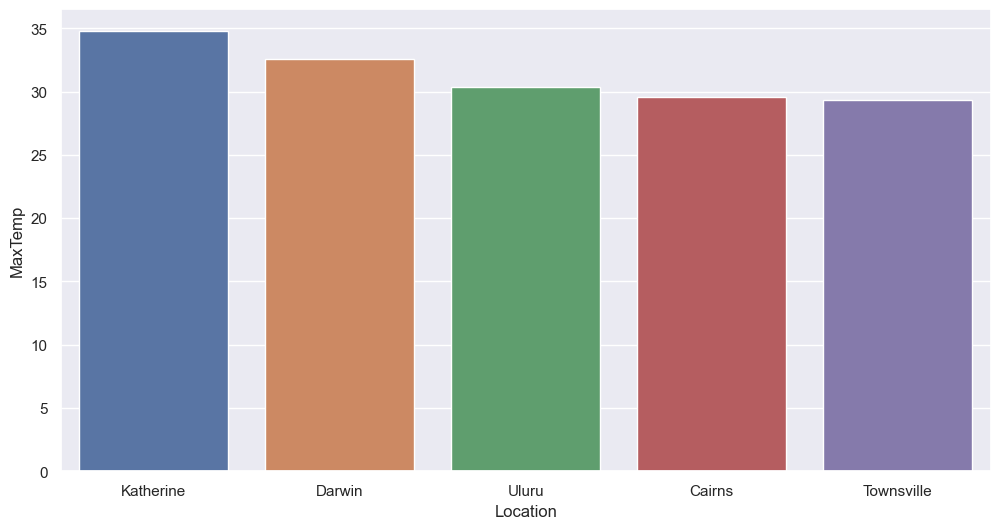

In [28]:
sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(x='Location', y='MaxTemp', data=Top5_maxtemp)

### 2. Lokasi mana yang memiliki jumlah curah hujan paling tinggi?

In [29]:
df_locr = data_weather.loc[:,['Location', 'Rainfall']]
df_locr.sort_values(by='Rainfall', ascending=False, inplace=True)
df_locr.head()

,Location,Rainfall
9368,CoffsHarbour,371.0
140071,Darwin,367.6
87242,Cairns,278.4
87995,Cairns,268.6
89371,Cairns,247.2


In [30]:
df_locr.tail()

,Location,Rainfall
57846,Ballarat,0.0
57845,Ballarat,0.0
57842,Ballarat,0.0
57841,Ballarat,0.0
145458,Uluru,0.0


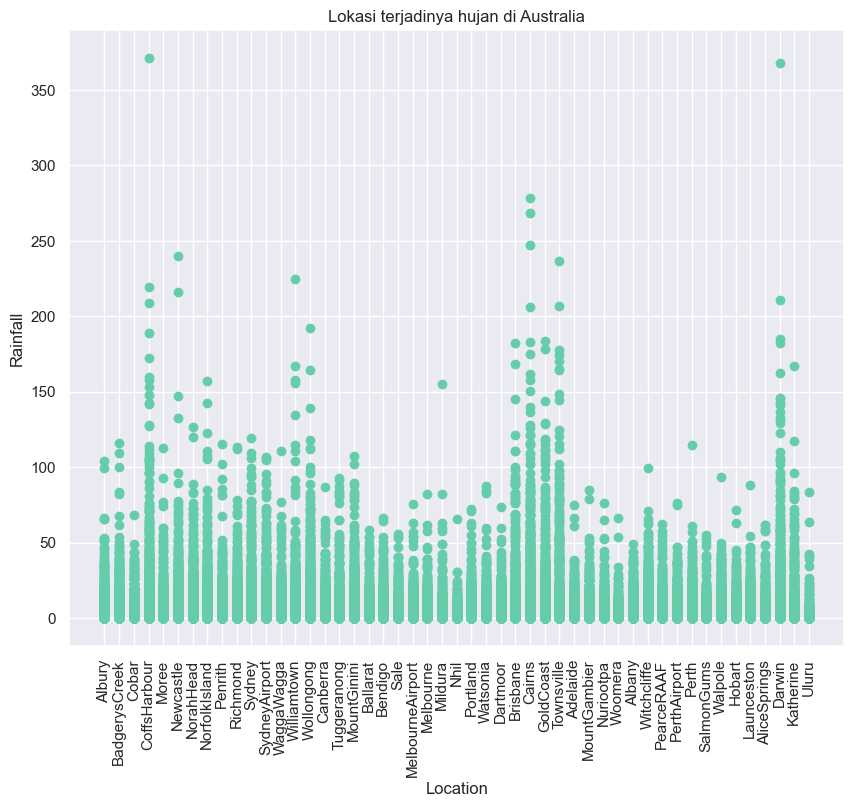

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(data_weather['Location'],data_weather['Rainfall'], color='mediumaquamarine')
plt.xticks(rotation=90)
plt.title("Lokasi terjadinya hujan di Australia")
plt.xlabel("Location")
plt.ylabel("Rainfall")
plt.show()

**Kesimpulan:** <br>

Berdasarkan visualisasi, dapat dilihat bahwa:

- Jumlah curah hujan tertinggi yang dicatat untuk hari itu terletak di lokasi CoffsHarbour dengan jumlah rainfall 371.0 mm
- Jumlah curah hujan tertinggi kedua terletak di lokasi Darwin dengan jumlah 367.6 mm 
- 3 jumlah curah hujan tertinggi lainnya terletak di lokasi Cairns dengan jumlah 278.4, 268.6, dan 247.2 mm

### 3. Bagaimana perbandingan hujan dan tidak hujan pada RainTomorrow?

In [32]:
RT = pd.DataFrame({"Jumlah curah hujan RainTomorrow":data_weather["RainTomorrow"].value_counts()})
RT

,Jumlah curah hujan RainTomorrow
No,110316
Yes,31877


In [33]:
data = RT["Jumlah curah hujan RainTomorrow"]

<AxesSubplot: >

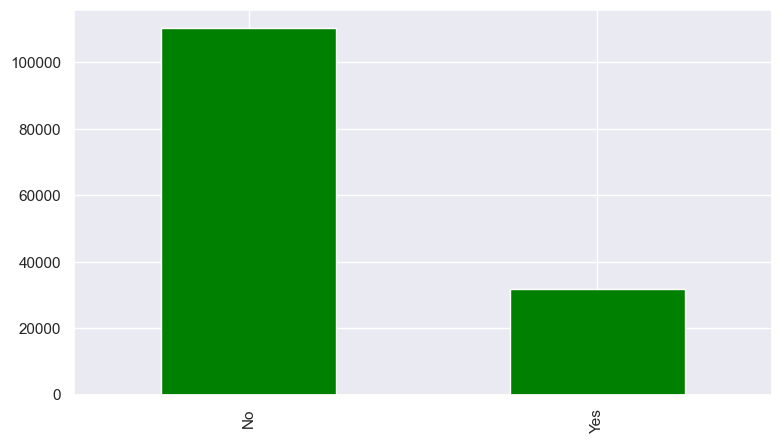

In [34]:
data.plot(kind='bar', color='green', figsize=(9,5))

**Kesimpulan:** <br>

Pada RainTomorrow, jumlah terjadi hujan ada sebanyak 31877 dan jumlah tidak terjadi hujan ada sebanyak 110316. Terdapat perbedaan yang sangat signifikan, yaitu sekitar 78439.

### 4.Melihat Persentase Hujan atau Tidak Hujan hari ini

<AxesSubplot: >

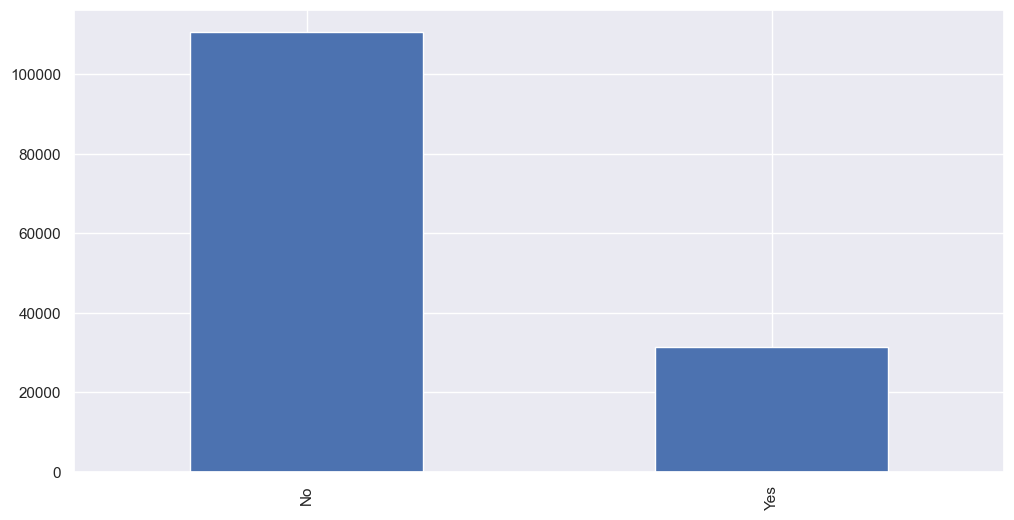

In [35]:
data_weather['RainToday'].value_counts().plot(kind='bar', figsize=(12, 6))

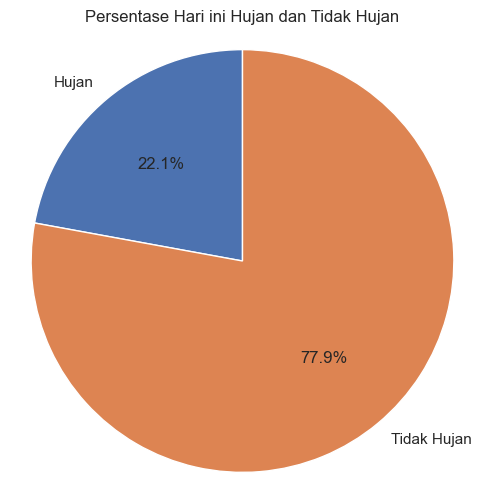

In [36]:
# menghitung jumlah hari hujan dan tidak hujan
hari_hujan = data_weather[data_weather['RainToday'] == 'Yes'].shape[0]
hari_tidakhujan = data_weather[data_weather['RainToday'] == 'No'].shape[0]

# membuat labels dan sizes untuk pie chart
labels = ['Hujan', 'Tidak Hujan']
sizes = [hari_hujan, hari_tidakhujan]

# membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Hari ini Hujan dan Tidak Hujan')
plt.axis('equal')
plt.show()

**Kesimpulan:**

1. Pada RainToday, terjadi hujan sebesar 22.1% dan tidak hujan sebesar 77.9%
2. Selisih antara keduanya adalah 55.8%

### 5. Apakah MinTemp dan MaxTemp dapat mempengaruhi RainTomorrow?

<AxesSubplot: xlabel='MaxTemp', ylabel='MinTemp'>

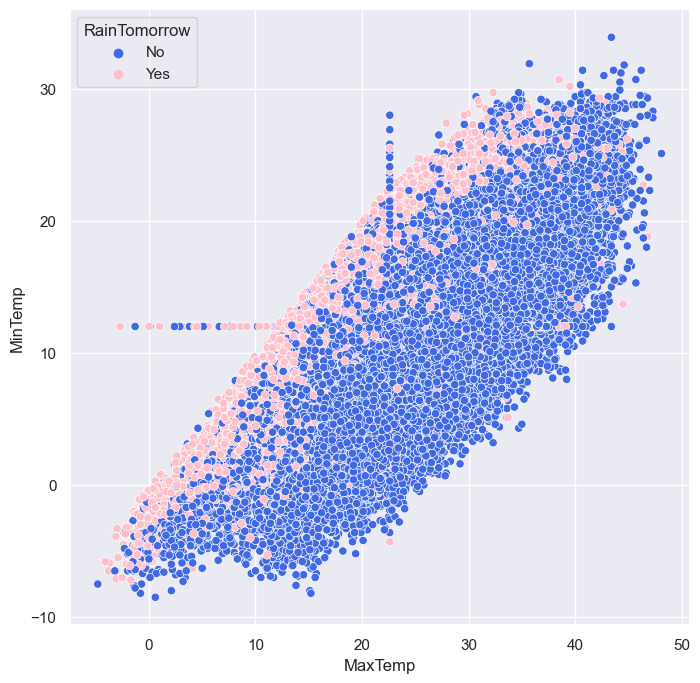

In [37]:
plt.figure(figsize=(8,8))
cols = ['royalblue','pink']
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = cols, data = data_weather)

**Kesimpulan:**

- Pada grafik di atas, titik pink menunjukkan bahwa besok akan turun hujan dan titik biru menunjukkan bahwa tidak akan turun hujan. 
- Dapat dilihat pada visualisasi tersebut,  bahwa terdapat hubungan yang kuat antara MinTemp dan MaxTemp dengan RainTomorrow. Sehingga, ada peluang hujan yang lebih besar tergantung dengan MinTemp dan MaxTemp nya.

### 6. Bagaimana rata-rata distribusi curah hujan pada setiap bulan?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 1000x800 with 0 Axes>

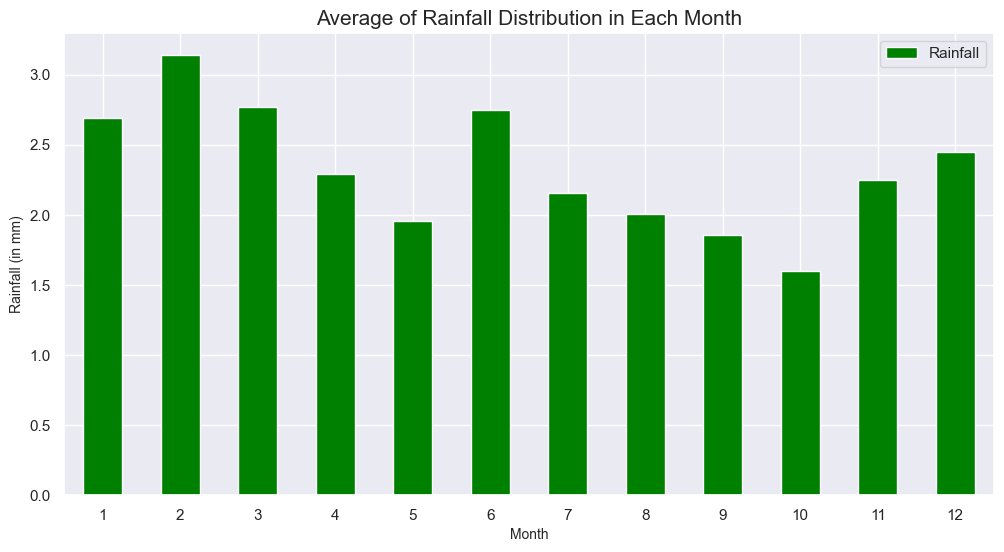

In [38]:
data_weather['Date'] = pd.to_datetime(data_weather['Date'], errors='coerce')
rainfall =[data_weather['Date'].dt.year, data_weather['Date'].dt.month, data_weather['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rainfall_df = pd.concat(rainfall, axis=1, keys=headers)

plt.figure(figsize=(10,8))
df_rain = rainfall_df.groupby('Month').agg({'Rainfall':'mean'})
df_rain.plot(kind='bar', color='green')
plt.title('Average of Rainfall Distribution in Each Month', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Rainfall (in mm)', fontsize=10)
plt.xticks(rotation=0)

In [39]:
df_rain.sort_values(by='Rainfall', ascending=False)

,Rainfall
Month,
2,3.139696
3,2.768855
6,2.751707
1,2.692942
12,2.451970
4,2.295109
11,2.252133
7,2.157297
8,2.009939


**Kesimpulan:** <br>
    
Berdasarkan visualisasi diatas, dapat disimpulkan bahwa:

- Rata-rata curah hujan tertinggi ada pada bulan 2 (Februari) dengan nilai 3.14 mm
- Rata-rata curah hujan terendah ada pada bulan 10 (Oktober) dengan nilai 1.60 mm

### 7. Bagaimana distribusi data dari Humidity9am, Humidity3pm, Pressure9am, dan Pressure3pm?

C:\Users\62857\AppData\Local\Temp\ipykernel_13920\3244307773.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_weather["Humidity9am"], color='blue')


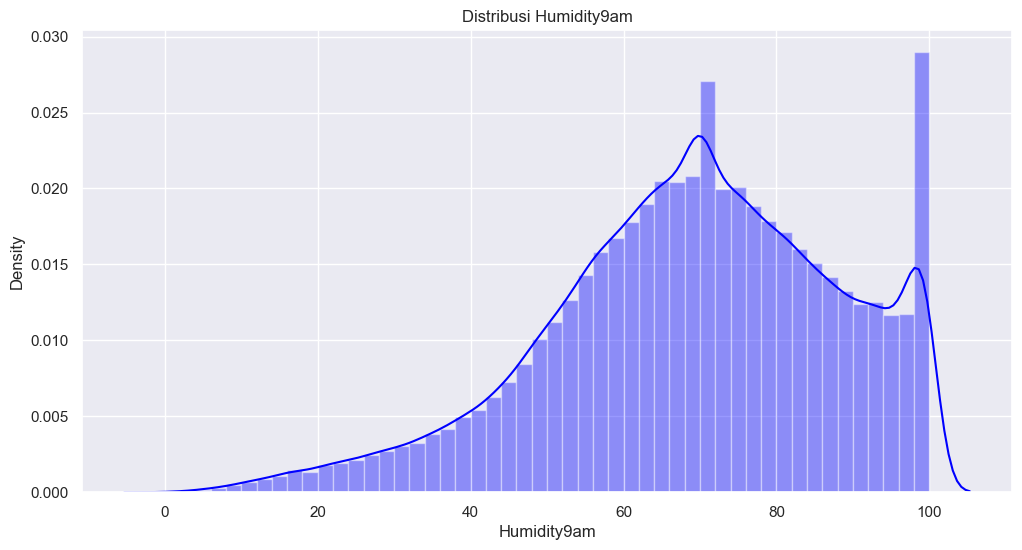

In [40]:
sns.distplot(data_weather["Humidity9am"], color='blue')
plt.title('Distribusi Humidity9am')
plt.show()

C:\Users\62857\AppData\Local\Temp\ipykernel_13920\978456259.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_weather["Humidity3pm"], color='blue')


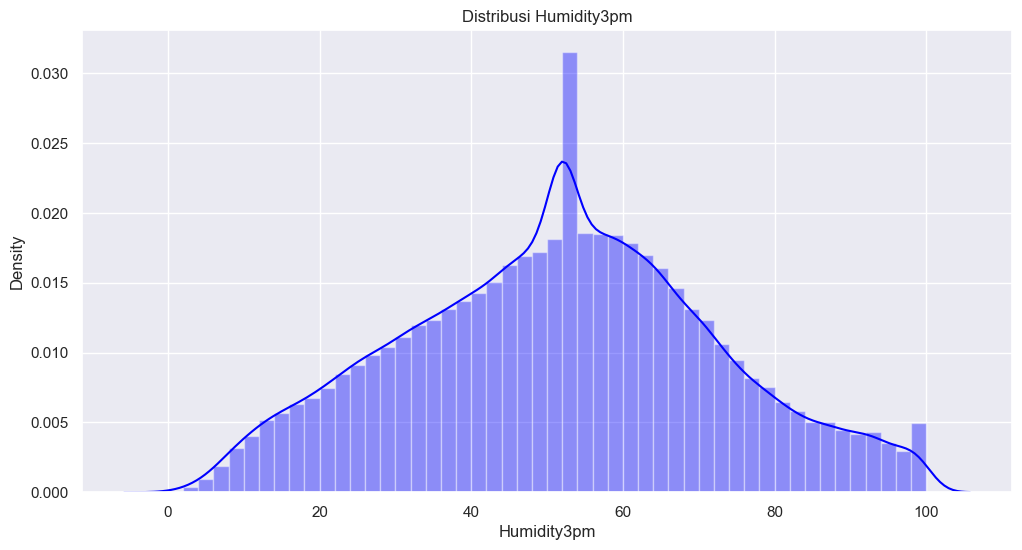

In [41]:
sns.distplot(data_weather["Humidity3pm"], color='blue')
plt.title('Distribusi Humidity3pm')
plt.show()

C:\Users\62857\AppData\Local\Temp\ipykernel_13920\207839046.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_weather["Pressure3pm"], color='green')


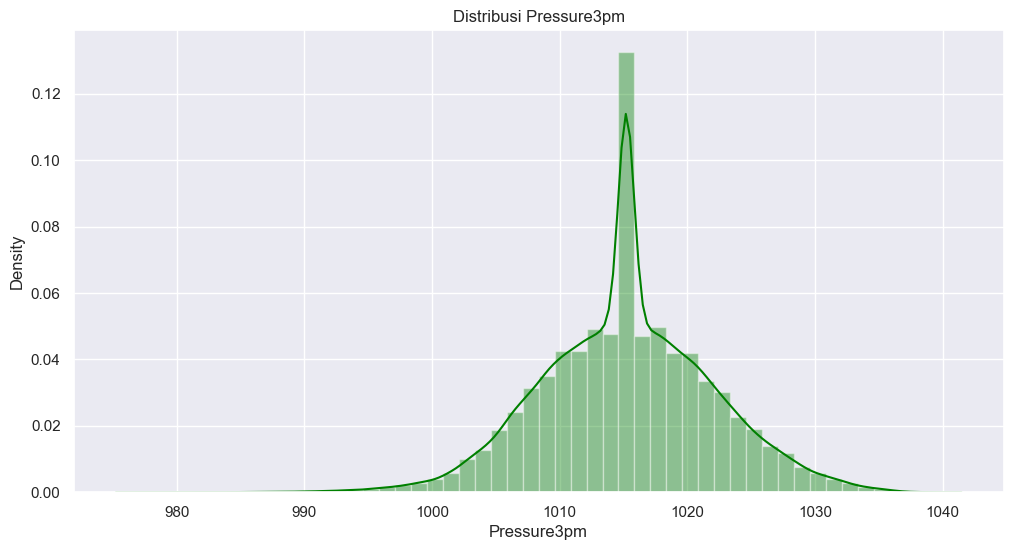

In [42]:
sns.distplot(data_weather["Pressure3pm"], color='green')
plt.title('Distribusi Pressure3pm')
plt.show()

C:\Users\62857\AppData\Local\Temp\ipykernel_13920\1532782857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_weather["Pressure9am"], color='green')


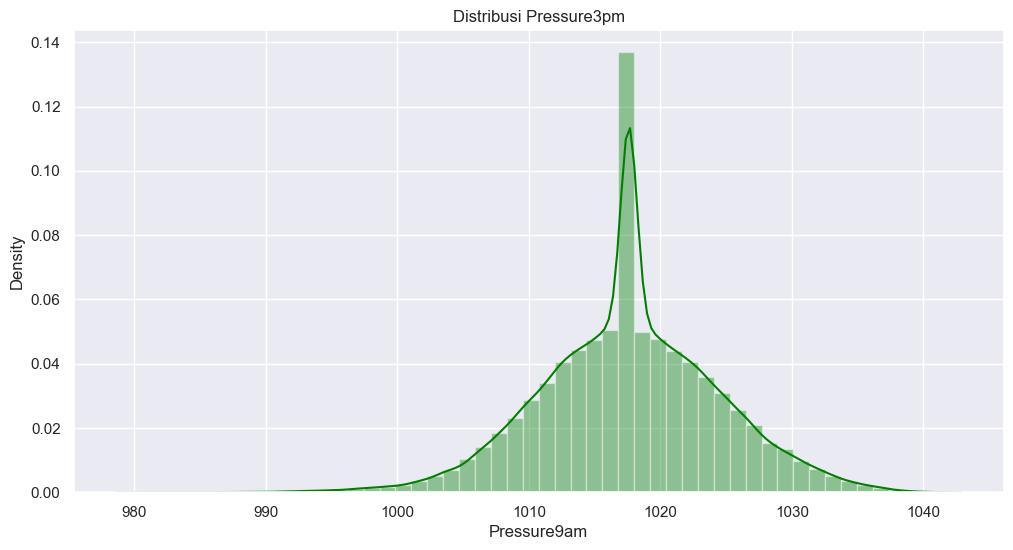

In [43]:
sns.distplot(data_weather["Pressure9am"], color='green')
plt.title('Distribusi Pressure3pm')
plt.show()

**Kesimpulan:**

Berdasarkan visualisasi data diatas, maka dapat disimpulkan bahwa:

- Distribusi data dari Humidity9am : Berdistribusi normal namun tidak sempurna, memiliki dua titik yang menjulang keatas dari rentang 60 - 100.
- Distribusi data dari Humidity3pm : Berdistribusi normal namun tidak sempurna, memiliki dua titik yang menjulang keatas dari rentang 50 - 100.
- Distribusi data dari Pressure9am : Berdistribusi normal namun tidak sempurna, memiliki satu titik yang menjulang keatas dari rentang 1010-1020.
- Distribusi data dari Pressure3pm : Berdistribusi normal namun tidak sempurna, memiliki satu titik yang menjulang keatas dari rentang 1010-1020.

## E.3. Analisis Korelasi
Analisis korelasi merupakan salah satu teknik statistik yang digunakan untuk menganalisis hubungan antara dua variabel atau lebih yang bersifat kuantitatif. Bahwa adanya perubahan sebuah variabel disebabkan atau akan diikuti dengan perubahan variabel lain.

Mengambil beberapa kolom sample dari df untuk uji korelasi

In [44]:
df_cor = data_weather.loc[:,['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']]
df_cor.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


#### E.3.1. Melakukan proses label encoding

In [45]:
# Membuat objek LabelEncoder untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

# Mengambil tipe data object pada dataset dan di simpan di df_encode_cor
df_category = df_cor.select_dtypes(include='object')
df_encode_cor = df_cor.copy()

for column in df_category.columns:
    df_encode_cor[column] = label_encoder.fit_transform(df_cor[column])

In [46]:
df_encode_cor.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


#### E.3.1.2. Membuat visualisasi heatmap berdasarkan df_cor1

In [47]:
# Membuat fungsi heat_map dengan 2 parameter
# nama df adalah nama datasetnya, list kolom adalah list korelasi yang ingin di cek
def heat_map(nama_df,list_kolom): 
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #Mengatur ukuran
    
    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(), 
                annot=True, 
                cmap="pink", 
                linewidths=.5, 
                linecolor='black', 
                square=True) 

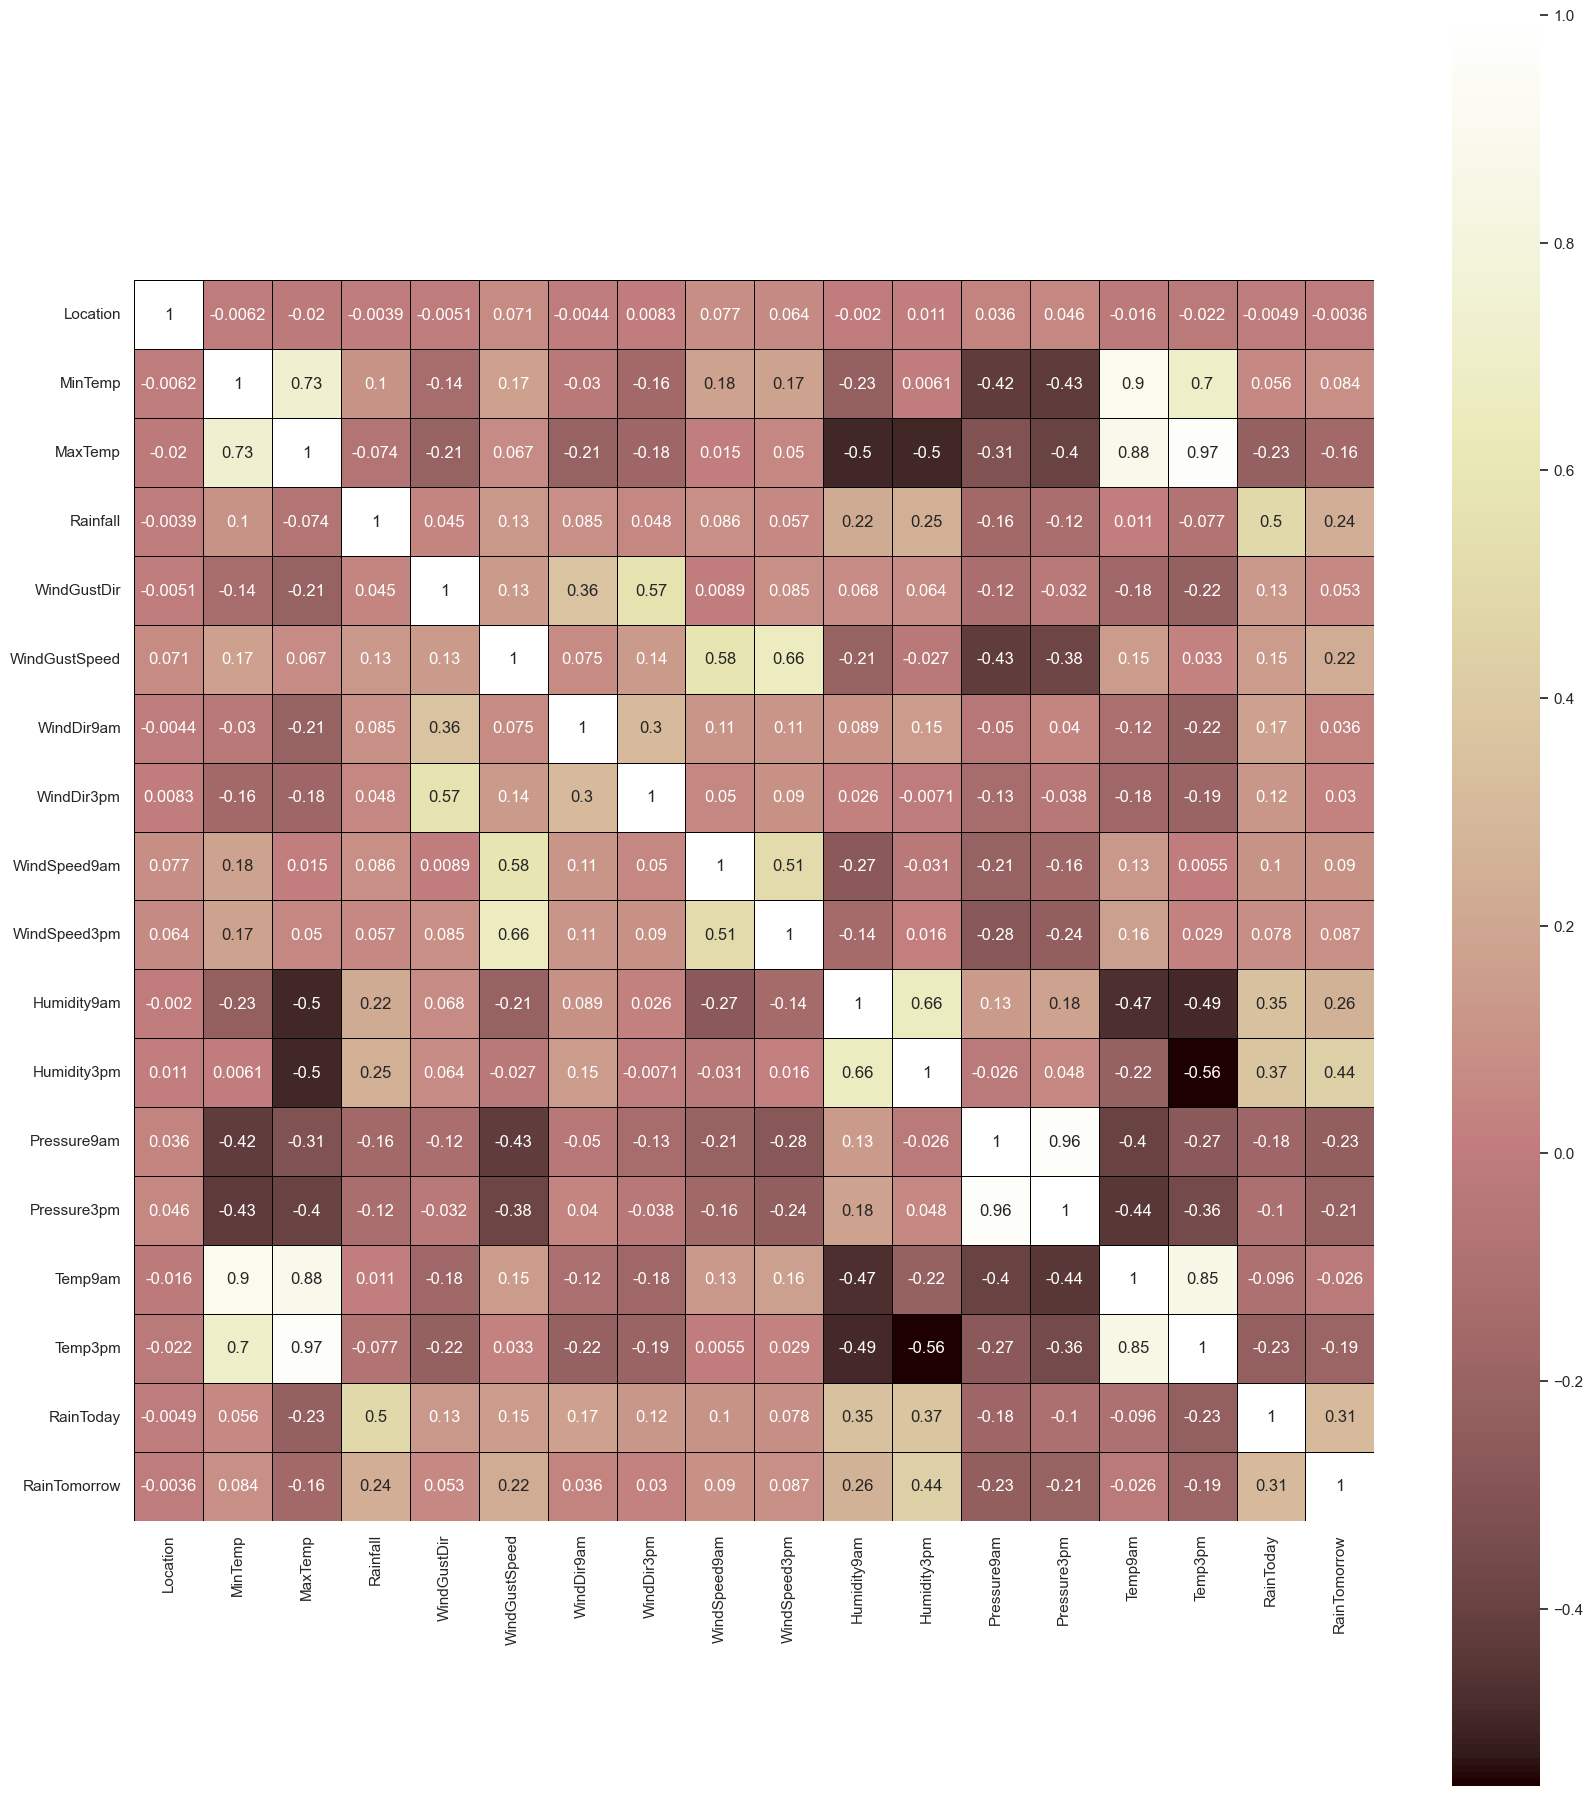

In [48]:
heat_map_modeling = ['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']
heat_map(df_encode_cor,heat_map_modeling)

**Keterangan:**

Pada heat map, warna digunakan untuk menggambarkan intensitas data. Warna yang lebih terang atau lebih panas mengindikasikan nilai yang rendah atau kecil, sementara warna yang lebih gelap atau lebih dingin mengindikasikan nilai yang lebih tinggi

Berdasarkan heatmap1, dipilih beberapa kolom yang memiliki korelasi cukup tinggi yang kemudian nantinya digunakan untuk variabel X dan Y pada modelling. Kolom tersebut diantaranya adalah sebagai berikut:
1. `Humidity3pm`, dengan korelasi sebesar 0.44
2. `RainToday`, dengan korelasi sebesar 0.31
3. `WindGustDir`, dengan korelasi sebesar 0.053
4. `Rainfall`, dengan korelasi sebesar 0.24
5. `WindGustSpeed`, dengan korelasi sebesar 0.23
6. `WindDir9am`, dengan korelasi sebesar 0,36
7. `MinTemp`, dengan korelasi sebesar 0.084
8. `WindSpeed3pm`, dengan korelasi sebesar 0,087
7. `RainTomorrow`, dengan korelasi sebesar 1

# F. Mencari Central Tendency & Measure of Spread 

1. Central Tendency merupakan nilai yang menunjukkan titik tengah dari suatu dataset untuk mengetahui dimana posisi banyak nilai data berkumpul di dalam distribusi. Nilai Mean, Median, dan Modus adalah ukuran Central Tendency yang paling umum digunakan. 
2. Measures of Spread didefinisikan sebagai cara untuk mendeskripsikan data dengan menjelaskan seberapa menyebar data kita. Cara yang sering digunakan adalah range, varian, dan standar deviasi.

Pada project ini, kami menggunakan kolom yang sudah dipilih dengan tipe data integer untuk dicari central tendency dan Measure of Spread nya.

In [49]:
df_central = data_weather.loc[:,['MinTemp','Rainfall','WindGustSpeed','Humidity3pm','Pressure9am']]
df_central.head()

,MinTemp,Rainfall,WindGustSpeed,Humidity3pm,Pressure9am
0,13.4,0.6,44.0,22.0,1007.7
1,7.4,0.0,44.0,25.0,1010.6
2,12.9,0.0,46.0,30.0,1007.6
3,9.2,0.0,24.0,16.0,1017.6
4,17.5,1.0,41.0,33.0,1010.8


In [50]:
#Menghitung mean, median, modus, range, variansi, dan Standard Deviasi
for column in df_central:
    mean = df_central[column].mean()
    median = df_central[column].median()
    mode = df_central[column].mode()[0]
    min_value = df_central[column].min()
    max_value = df_central[column].max()
    range_value = max_value - min_value
    variance = df_central[column].var()
    std_dev = df_central[column].std()
    
#Print hasilnya
    print(f"Nama Kolom: {column}")
    print(f"Mean: {mean:.3f}")
    print(f"Median: {median:.3f}")
    print(f"Modus: {mode:.3f}")
    print(f"Range: {range_value:.3f}")
    print(f"Variansi: {variance:.3f}")
    print(f"Standard Deviasi: {std_dev:.3f}")
    print("  ")

Nama Kolom: MinTemp
Mean: 12.186
Median: 12.000
Modus: 12.000
Range: 42.400
Variansi: 40.819
Standard Deviasi: 6.389
  
Nama Kolom: Rainfall
Mean: 2.327
Median: 0.000
Modus: 0.000
Range: 371.000
Variansi: 71.005
Standard Deviasi: 8.426
  
Nama Kolom: WindGustSpeed
Mean: 39.920
Median: 39.000
Modus: 39.000
Range: 129.000
Variansi: 172.676
Standard Deviasi: 13.141
  
Nama Kolom: Humidity3pm
Mean: 51.496
Median: 52.000
Modus: 52.000
Range: 100.000
Variansi: 421.572
Standard Deviasi: 20.532
  
Nama Kolom: Pressure9am
Mean: 1017.648
Median: 1017.600
Modus: 1017.600
Range: 60.500
Variansi: 45.512
Standard Deviasi: 6.746
  


Pada data central ini masing-masing kolom terdapat nilai mean,median,modus,range,variansi,dan stadart deviasi yang berbebeda hasilnya

# G. Cardinality

Cardinality / Kardinalitas adalah ukuran keunikan data pada kolom tertentu dari suatu table database. Tujuan kita adalah mengurangi cardinality untuk membuat model yang lebih konsisten dan tidak over-fit. Kita memastikan semua label unik yang ada pernah dilihat model saat training.

In [51]:
df_card = data_weather.loc[:,['Location','MinTemp','Rainfall','WindGustDir','WindGustSpeed','Humidity3pm','Pressure9am','RainToday','RainTomorrow']]
df_card.head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,Albury,13.4,0.6,W,44.0,22.0,1007.7,No,No
1,Albury,7.4,0.0,WNW,44.0,25.0,1010.6,No,No
2,Albury,12.9,0.0,WSW,46.0,30.0,1007.6,No,No
3,Albury,9.2,0.0,NE,24.0,16.0,1017.6,No,No
4,Albury,17.5,1.0,W,41.0,33.0,1010.8,No,No


In [52]:
print('Jumlah kategori dalam variabel Location        : {}'.format(len(df_card.Location.unique())))
print('Jumlah kategori dalam variabel MinTemp         : {}'.format(len(df_card.MinTemp.unique())))
print('Jumlah kategori dalam variabel Rainfall        : {}'.format(len(df_card.WindGustDir.unique())))
print('Jumlah kategori dalam variabel WindGustSpeed   : {}'.format(len(df_card.WindGustSpeed.unique())))
print('Jumlah kategori dalam variabel Humidity3pm     : {}'.format(len(df_card.Humidity3pm.unique())))
print('Jumlah kategori dalam variabel Pressure9am     : {}'.format(len(df_card.Pressure9am.unique())))
print('Jumlah kategori dalam variabel RainToday       : {}'.format(len(df_card.RainToday.unique())))
print('Jumlah kategori dalam variabel RainTomorrow    : {}'.format(len(df_card.RainTomorrow.unique())))

Jumlah kategori dalam variabel Location        : 49
Jumlah kategori dalam variabel MinTemp         : 389
Jumlah kategori dalam variabel Rainfall        : 16
Jumlah kategori dalam variabel WindGustSpeed   : 67
Jumlah kategori dalam variabel Humidity3pm     : 101
Jumlah kategori dalam variabel Pressure9am     : 546
Jumlah kategori dalam variabel RainToday       : 2
Jumlah kategori dalam variabel RainTomorrow    : 2


**Keterangan:**

Dapat dilihat bahwa number of categories (unique value) dari MinTemp dan Pressure9am sangat banyak atau biasa disebut dengan istilah high cardinality. Namun, dikarenakan MinTemp merupakan temperature minimal dan Pressure9am merupakah nilai tekanan maka tidak dapat dilakukan reduced cardinality walaupun termasuk kedalam high cardinality. Karena kita tidak bisa mereduced temperature dan tekanan yang tentunya dapat berbeda setiap harinya.

# H. Undersampling

Undersampling adalah salah satu teknik yang digunakan dalam pemrosesan data ketika kita memiliki ketidakseimbangan kelas dalam dataset. Ini adalah pendekatan yang digunakan untuk mengatasi situasi di mana satu kelas dalam dataset memiliki jumlah sampel yang jauh lebih sedikit daripada kelas lainnya.

In [53]:
# membuat 2 dataframe dari majority dan minority class 
df_majority = df_encode_cor[(df_encode_cor['RainTomorrow']==0)] 
df_minority = df_encode_cor[(df_encode_cor['RainTomorrow']==1)] 

# upsample minority class
df_majority_undersampling = resample(df_majority, replace = True, n_samples = 31877, random_state = 42)

# Combine majority class with upsampled minority class
df_undersampling = pd.concat([df_majority_undersampling, df_minority]) 

In [54]:
df_undersampling.reset_index(inplace=True, drop=True)
df_undersampling.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,26,17.7,26.4,0.0,4,52.0,5,4,22.0,31.0,76.0,82.0,1021.5,1018.7,20.3,20.9,0,0
1,2,16.3,32.8,0.0,3,26.0,10,15,11.0,7.0,55.0,30.0,1017.4,1012.9,21.1,31.1,0,0
2,3,3.8,27.0,0.0,0,31.0,1,2,11.0,19.0,22.0,14.0,1022.7,1017.7,15.8,25.9,0,0
3,41,9.5,25.6,0.0,0,39.0,1,0,19.0,20.0,42.0,21.0,1025.6,1020.8,16.2,24.4,0,0
4,28,11.1,23.3,0.0,2,30.0,10,9,9.0,15.0,87.0,36.0,1020.9,1017.5,12.5,22.5,0,0


In [55]:
df_undersampling['RainTomorrow'].value_counts()

0    31877
1    31877
Name: RainTomorrow, dtype: int64

In [56]:
df_undersampling.shape

(63754, 18)

Dikarenakan jumlah data yang tidak seimbang antara Yes dan No, maka diterapkan proses Undersampling. Setelah dilakukan proses undersampling dengan menyesuaikan nilai minoritas, data menjadi seimbang dengan jumlah RainTomorrow antara No (0) dan Yes (1) yaitu sebanyak 31877. Dataset yang digunakan untuk proses selanjutnya berjumlah 63754 dari yang sebelum dilakukan proses undersampling yaitu sebanyak 145460. Proses selanjutnya yaitu Feature Scaling.

# J. Analisis

Pada tahap ini berisi kondisi yang kami buat dengan tujuan untuk memaksimalkan hasil modelling nanti beserta tahapan-tahapan lainnya agar kondisi-kondisi tersebut semakin optimal. Diantaranya adalah mengindentifikasi data, menghandle outliers, dan menghitung nilai kuartil.

In [57]:
# Copy data frame df_new dan simpan pada df_model
df_new = df_undersampling.copy()
df_model = df_new.loc[:,['Location','MinTemp','Rainfall','WindGustDir','WindGustSpeed','Humidity3pm','Pressure9am','RainToday','RainTomorrow']]

In [58]:
df_model.head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,26,17.7,0.0,4,52.0,82.0,1021.5,0,0
1,2,16.3,0.0,3,26.0,30.0,1017.4,0,0
2,3,3.8,0.0,0,31.0,14.0,1022.7,0,0
3,41,9.5,0.0,0,39.0,21.0,1025.6,0,0
4,28,11.1,0.0,2,30.0,36.0,1020.9,0,0


## J.1. Kondisi 
Memilih kolom dengan korelasi paling tinggi berdasarkan analisis korelasi yang telah dilakukan. Kolom yang dipilih sudah melalui proses encoding, undersampling dan feature scaling.

In [59]:
df_kondisi = df_model.loc[:,['Location','MinTemp','Rainfall','WindGustDir','WindGustSpeed','Humidity3pm','Pressure9am','RainToday','RainTomorrow']]
df_kondisi.head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,26,17.7,0.0,4,52.0,82.0,1021.5,0,0
1,2,16.3,0.0,3,26.0,30.0,1017.4,0,0
2,3,3.8,0.0,0,31.0,14.0,1022.7,0,0
3,41,9.5,0.0,0,39.0,21.0,1025.6,0,0
4,28,11.1,0.0,2,30.0,36.0,1020.9,0,0


In [60]:
df_kondisi['RainTomorrow'].value_counts()

0    31877
1    31877
Name: RainTomorrow, dtype: int64

### J.1.1. Mengidentifikasi data apakah berdistribusi normal atau skewness

In [61]:
# Membuat fungsi untuk visualisasi histogram dan boxplot dengan 2 parameter
def diagnostic_plots(df_kondisi, variable):
    # Mengatur ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_kondisi[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_kondisi[variable])
    plt.title('Boxplot')

    plt.show()

In [62]:
select = df_kondisi[['RainTomorrow']]
select.head()

,RainTomorrow
0,0
1,0
2,0
3,0
4,0


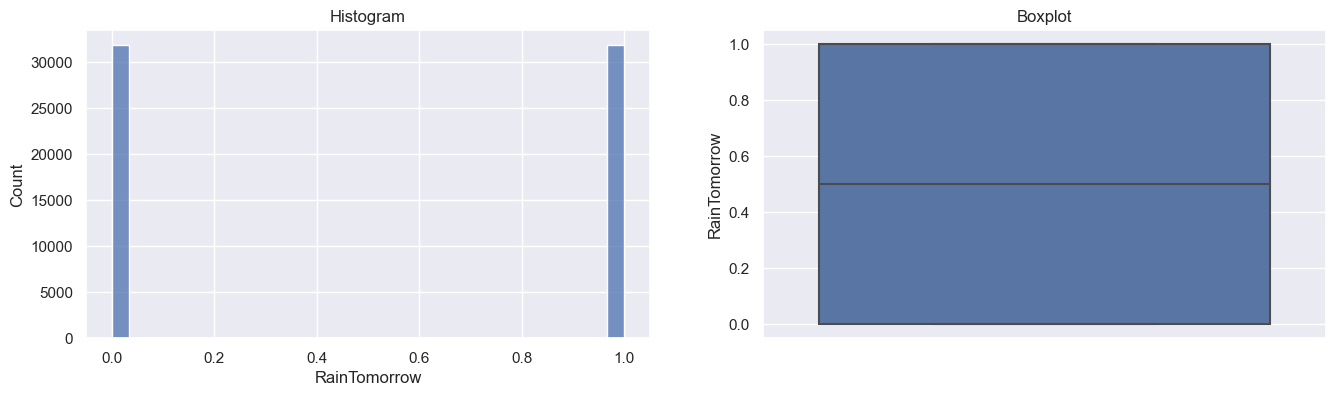

Skewness Value :  0.0


In [63]:
diagnostic_plots(select, 'RainTomorrow')
print('Skewness Value : ', select['RainTomorrow'].skew())

Ternyata data tersebut tidak memiliki Skewness Value, selanjutnya mengecek apakah ada outlier

### J.1.2. Outliers

In [64]:
# Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ['RainTomorrow']  
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('Pada kolom {}, jumlah outliernya adalah {}'.format(each_feature, len(outliers)))
        if drop:
            df_undersampling.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

In [65]:
outliers(df_kondisi[continous_features])

Pada kolom RainTomorrow, jumlah outliernya adalah 0


Ternyata tidak ada outlier pada kolom RainTomorrow setelah dilakukan undersampling. Mari kita lanjut ke modelling.

# H. Feature Scaling

Feature scaling adalah teknik untuk membuat skala data setiap fitur menjadi sama. Pada project ini, kami menggunakan MinMax Scaler yang melakukan transform feature dengan mengubah setiap data ke range tertentu antara 0-1.

In [66]:
x = df_kondisi.drop(columns=['RainTomorrow'],axis=1).values
y = df_kondisi['RainTomorrow'].values

# Memisahkan data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [67]:
scaler = StandardScaler()

In [68]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# K. Modelling

## K.1. Logistic Regression

### K.1.1. Pendefinisian Model
Mendefinisikan model logistic regression

In [69]:
lr_model = LogisticRegression()

### K.1.2. Pelatihan Model

Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

In [70]:
# model training
lr_model.fit(x_train, y_train)

LogisticRegression()

In [71]:
y_pred = lr_model.predict(x_test)

### K.1.3. Evaluasi Model
Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. 

#### K.1.3.1. Mencari nilai akurasi dan classification report

In [72]:
# Mengevaluasi model data train
lr_predict_train = lr_model.predict(x_train)

print("Accuracy :", metrics.accuracy_score(y_train, lr_predict_train))

Accuracy : 0.7601227956170031


In [73]:
# Mengevaluasi model data test
lr_predict_test = lr_model.predict(x_test)

print("Accuracy :", metrics.accuracy_score(y_test, lr_predict_test))

Accuracy : 0.7622732263292727


In [74]:
# confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))

Confusion Matrix
[[7358 2169]
 [2378 7222]]


In [75]:
# Classification report
print("Classification Report :")
print(metrics.classification_report(y_test, lr_predict_test))

Classification Report :
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      9527
           1       0.77      0.75      0.76      9600

    accuracy                           0.76     19127
   macro avg       0.76      0.76      0.76     19127
weighted avg       0.76      0.76      0.76     19127



#### K.1.3.2. Melihat hasil prediksi dan perbandingan dengan data aktual

In [76]:
y_test

array([0, 1, 0, ..., 1, 1, 1])

In [77]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [78]:
kondisi = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
kondisi.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1


#### K.1.3.3. Membuat visualisasi confusion matrix logistic regression

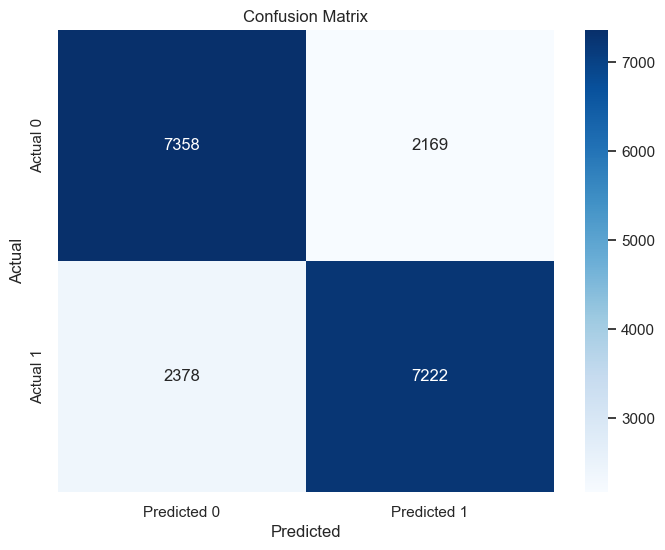

In [79]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

Dalam Confusion Matrix diatas:

- True Positive (TP) adalah 7226, yang berarti ada 7226 prediksi yang benar memprediksi kelas positif.
- True Negative (TN) adalah 7352, yang berarti ada 7352 prediksi yang benar memprediksi kelas negatif.
- False Positive (FP) adalah 2175, yang berarti ada 2175 prediksi yang salah memprediksi kelas positif.
- False Negative (FN) adalah 2374, yang berarti ada 2374 prediksi yang salah memprediksi kelas negatif.

Kesimpulan dari Confusion Matrix ini adalah sebagai berikut:

Model memiliki kinerja yang baik dalam memprediksi kelas positif dan negatif (karena TP dan TN yang tinggi).
Ada sejumlah false positives (FP) dan false negatives (FN), yang menunjukkan bahwa model tidak sempurna dalam memprediksi kelas. Ini adalah area yang mungkin perlu perhatian lebih lanjut untuk peningkatan kinerja model.

#### K.1.3.4. Membuat ROC Curve

Recevier Operating Characteristic (ROC) merupakan hasil dari pengukuran klasifikasi dalam bentuk 2 dimensi,dimana garis horizontal menggambarkan nilai false positif dan garis vertikal mengambarkan nilai true positive. Area Under Curve (AUC) adalah area yang berada dibawah kurva merupakan wilayah yang yang menunjukkan tingkat keakuratan dari model prediksi dan dihitung dengan metode perhitungan.

ROC AUC mengukur kinerja model dalam mengklasifikasikan kelas positif dan negatif. ROC AUC memiliki rentang nilai antara 0 dan 1, dengan 1 mengindikasikan kinerja yang sempurna. ROC AUC digunakan untuk mengevaluasi model klasifikasi biner dan mengetahui seberapa baik model membedakan antara kelas positif dan negatif.

No Skill ROC AUC Score            = 0.5
Logistic Regression ROC AUC Score = 0.8421250185875231


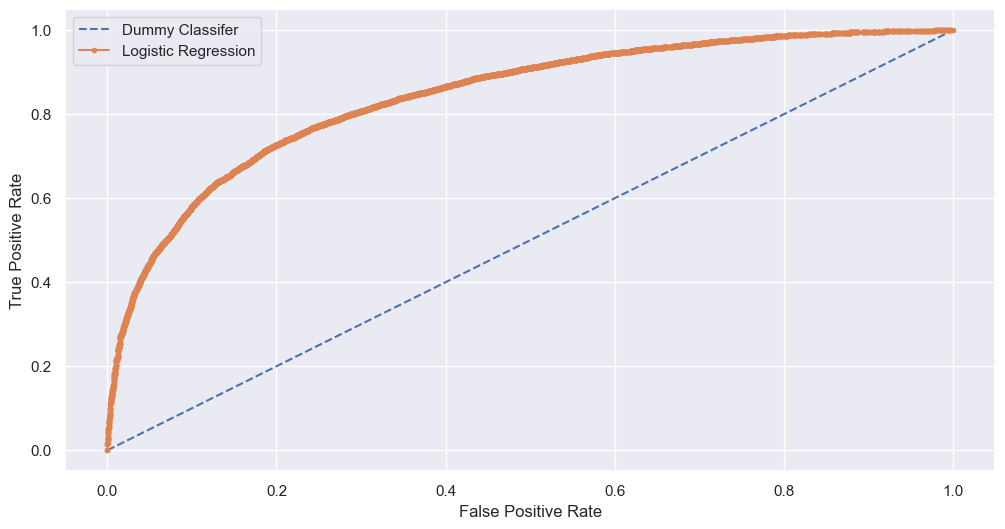

In [80]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill ROC AUC Score            =', ns_auc)
print('Logistic Regression ROC AUC Score =', lr_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

## K.2. SVM (Support Vector Machine)

### K.2.1. Pendefinisian Model
Mendefinisikan model Support Vector Machine

### K.2.2. Pelatihan Model

Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

In [81]:
# Membuat model SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

In [82]:
# Melatih model SVM pada data pelatihan
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [83]:
# Melakukan prediksi pada data pengujian
y_pred = svm_model.predict(x_test)

In [84]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7632143043864694


### K.2.3. Evaluasi Model
Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. 

#### K.2.3.1. Mencari nilai akurasi dan classification report

In [85]:
# Mengevaluasi model data train
svm_predict_train = svm_model.predict(x_train)

print("Accuracy :", metrics.accuracy_score(y_train, svm_predict_train))

Accuracy : 0.7607950343962175


In [86]:
# Mengevaluasi model data test
svm_predict_test = svm_model.predict(x_test)

print("Accuracy :", metrics.accuracy_score(y_test, svm_predict_test))

Accuracy : 0.7632143043864694


In [87]:
# Menampilkan classification report
print("classification_report :")
print(classification_report(y_test, svm_predict_test))

classification_report :
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      9527
           1       0.78      0.74      0.76      9600

    accuracy                           0.76     19127
   macro avg       0.76      0.76      0.76     19127
weighted avg       0.76      0.76      0.76     19127



In [88]:
# Menampilkan confusion matrix
print("confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, svm_predict_test)))

confusion matrix
[[7477 2050]
 [2479 7121]]


In [89]:
kondisi = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
kondisi.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1


#### K.2.3.3. Membuat visualisasi confusion matrix logistic regression

Text(0.5, 1.0, 'Confusion Matrix')

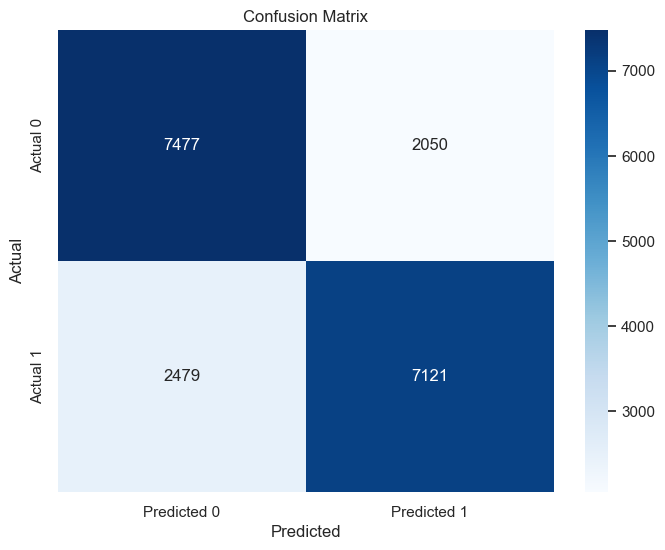

In [90]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


1. True Positive (TP) sejumlah 4753, yang mengindikasikan bahwa terdapat 4753 prediksi yang benar memprediksi kelas positif. Ini adalah hasil positif yang akurat dalam prediksi.

2. True Negative (TN) sejumlah 7986, yang menunjukkan bahwa ada 7986 prediksi yang benar memprediksi kelas negatif. Ini adalah hasil negatif yang akurat dalam prediksi.

3. False Positive (FP) sejumlah 1342, yang artinya ada 1342 prediksi yang salah memprediksi kelas positif. Ini merupakan kesalahan dalam memprediksi kelas positif (false alarm).

4. False Negative (FN) sejumlah 1670, yang menunjukkan ada 1670 prediksi yang salah memprediksi kelas negatif. Ini merupakan kesalahan dalam memprediksi kelas negatif (missed detection).

Dari data ini, kita dapat melakukan berbagai perhitungan dan analisis yang lebih lanjut untuk mengukur kinerja model klasifikasi, seperti menghitung akurasi, presisi, recall (sensitivity), dan lainnya. Informasi ini dapat digunakan untuk mengukur sejauh mana model klasifikasi mampu memprediksi dengan benar dan mengidentifikasi kelemahan dalam prediksi yang dapat diperbaiki.

# Model Inference

In [91]:
# Memasukkan data 'Location=','MinTemp','Rainfall','WindGustDir'
#'WindGustSpeed','Humidity3pm','Pressure9am','RainToday',
input_data = np.array([[0.541666, 0.6134, 0.0, 0.2300, 0.1934, 0.2356, 0.81, 0]])
prediction = lr_model.predict(input_data)
print("prediksi  :", prediction)

prediksi  : [1]


In [94]:
# Memasukkan data 'Location=','MinTemp','Rainfall','WindGustDir'
#'WindGustSpeed','Humidity3pm','Pressure9am','RainToday',
input_data = np.array([[0.54, 0.45, 0.001, 0.2, 0.15, 0.11, 0.37, 1]])
prediction = svm_model.predict(input_data)
print("prediksi  :", prediction)

prediksi  : [1]


In [97]:
model_inference = {'Lokasi':[0.542753, 0.273645, 0.182743],
                   'Temp':[0.273942, 0.193848, 0.392837],
                   'CurahHujan':[0.008263, 0.017258, 0.000129],
                   'ArahAngin':[0.133333, 0.200000, 0.0],
                   'KecepatanAngin':[0.429837, 0.152628, 0.336261],
                   'Kelembaban':[0.18, 0.65, 0.42],
                   'Tekanan':[0.718292, 0.625273, 0.827362],
                   'HujanSekarang':[0, 1, 1]
                  }
model_inference = pd.DataFrame(model_inference)
model_inference

,Lokasi,Temp,CurahHujan,ArahAngin,KecepatanAngin,Kelembaban,Tekanan,HujanSekarang
0,0.542753,0.273942,0.008263,0.133333,0.429837,0.18,0.718292,0
1,0.273645,0.193848,0.017258,0.200000,0.152628,0.65,0.625273,1
2,0.182743,0.392837,0.000129,0.000000,0.336261,0.42,0.827362,1


# Kesimpulan Keseluruhan

Pada final project ini dilakukan pemodelan menggunakan **Logistic Regression** dan **Support Vector Machine (SVM)** untuk mengklasifikasi terjadinya hujan pada esok hari (RainTomorrow) dengan kondisi :
1. Dataset tersebut melalui proses data cleaning. Dilakukan penghapusan kolom yang mempunyai missing value > 30% dan untuk kolom yang mempunyai missing value < 30% dilakukan fillna dengan median. Sedangkan, untuk kolom RainTomorrow (target) dilakukan notna agar dihasilkan nilai yang tidak memiliki missing value. 
2. Selanjutnya dilakukan proses balancing data. Pada project ini, kami menggunakan teknik undersampling. Alasannya karena menurut kami teknik undersampling mudah digunakan, menghasilkan data yang seimbang, dan menghasilkan tidak terlalu banyak jumlah data.
3. Kemudian dilakukan proses feature scaling, kami menggunakan minmaxscaler agar didapatkan hasil yang positif.

**Hal-hal yang berpengaruh pada hasil klasifikasi RainTomorrow antara lain:**
1. Berdasarkan uji korelasi, **Humidity3pm** memiliki nilai korelasi sebesar 0.44. Artinya, jika semakin besar kelembaban pada jam 3 Sore (Humidity3pm), maka kemungkinan terjadinya hujan esok hari (RainTomorrow) akan semakin besar juga.
2. Berdasarkan uji korelasi, **RainToday** memiliki nilai korelasi sebesar 0.31. Artinya, jika semakin banyak terjadi hujan pada hari ini (RainToday), maka kemungkinan terjadinya hujan esok hari (RainTomorrow) akan semakin besar juga.
3. Berdasarkan uji korelasi, **Rainfall** memiliki nilai korelasi sebesar 0.24. Artinya, jika semakin besar Jumlah Curah Hujan Tercatat dalam sehari (Rainfall), maka kemungkinan terjadinya hujan esok hari (RainTomorrow) akan semakin besar juga.
4. Berdasarkan uji korelasi, **WindGustSpeed** memiliki nilai korelasi sebesar 0.23. Artinya, jika semakin besar Kecepatan Angin terkuat dalam sehari (WindGustSpeed), maka kemungkinan terjadinya hujan esok hari (RainTomorrow) akan semakin besar juga.

**Setelah dilakukan pelatihan dan evaluasi model, didapatkan hasil:**
1. Logistic Regression
    - Train set Accuracy: 0.7601227956170031
    - Test set Accuracy: 0.7622732263292727
2. Support Vector Machine (SVM)
    - Train set Accuracy: 0.7607950343962175
    - Test set Accuracy: 0.7632143043864694

**Hasil Model Inference** <br>
Setelah membuat model inference dengan menggunakan data yang dibuat sendiri dan di klasifikasi menggunakan model yang telah dibuat sebelumnya, maka didapatkan hasil prediksi hujan untuk setiap data adalah 0, 1, dan 1.

# Model Deployment

In [93]:
import pickle

filename = 'prediksi_hujan.sav'
pickle.dump(svm_model, open(filename,'wb'))